# Section2 Project - AI_05_김민주_Section2
# "통신회사에서 고객의 이탈을 어떻게 줄일 수 있을까?"


# 1. 데이터 선정 이유 및 문제 정의
## (1) 데이터 선정 이유 : 모든 기업의 핵심은 "고객"
 모든 기업에서 가장 중요한 것은 회사의 이익을 위해 "고객을 모으는 것"입니다. 하지만 새로운 고객을 얻는 것은 많은 비용과 시간이 필요합니다. 그와 비교해서 "고객 이탈을 막고 현재 고객을 잘 유지하는 것"은 장기적으로 더 경제적이고 효과적인 전략입니다. 따라서 **많은 기업들의 가장 큰 이슈인 고객 이탈에 대한 데이터**를 가지고 분석을 하였습니다.
## (2) 문제 정의 : "통신회사에서 고객의 이탈을 어떻게 줄일 수 있을까?"
## (3) 문제 접근 : 분류

# 2. 데이터를 이용한 가설 및 평가지표, 베이스라인 선택
## (1) 가설 설정 
#### - 성별에 따라서 고객의 이탈하는 정도에 차이가 있을까?
#### - 사용기간에 따라서 고객이 이탈하는 정도에 차이가 있을까?
#### - TotalCharges'가 'tenure'과 'MonthlyCharges'와 관련이 있을까?

## (2) 평가지표 : recall, F1 score

## (3) 베이스라인 : 타겟의 최빈값
## (4) 타겟 : Churn(고객 이탈 여부)
## (5) 프로젝트 질문
- 해당 특성을 target으로 지정한 이유를 설명하세요
###### 이유 : 데이터셋의 목적인 고객 이탈 여부와 가장 밀접한 관련이 있는 특성이므로 지정했습니다.
- 해당 특성을 target으로 지정한 이유를 설명하세요
###### 이유 : 불균형한 분포를 갖고 있는 타겟이므로 타겟의 최빈값을 베이스라인으로 하는 것이 적절합니다.


# 3. EDA와 데이터 전처리
## (1) 데이터 불러오기


In [ ]:
!pip install eli5 
import eli5 

     |████████████████████████████████| 106 kB 4.3 MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
!pip install catboost
import catboost

     |████████████████████████████████| 67.4 MB 27 kB/s 


In [ ]:
!pip install pdp
import pdp

  Created wheel for pdp: filename=pdp-0.3.0-py3-none-any.whl size=6618 sha256=792f8df6aa3921d6f52cea75ef21442585d3a8b3dedbeb8bc1d6eb662160653c
  Stored in directory: /root/.cache/pip/wheels/86/3f/21/790268989f0e594527d3b781d80e150499eb918f8c88c1509a
Successfully built pdp


In [ ]:
import numpy as np
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import eli5 
from eli5.sklearn import PermutationImportance 
from scipy.stats import randint, uniform
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [ ]:
from google.colab import files
myfile = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
data = pd.read_csv(io.BytesIO(myfile['WA_Fn-UseC_-Telco-Customer-Churn.csv']))
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## (2) 데이터 분석

### 데이터 컬럼 설명
1. customerID : 각 고객을 식별하는 고유 ID입니다.
2. gender : 고객의 성별 -> Male, Female
3. SeniorCitizen : 고객이 65세 이상인지 여부를 나타냅니다. -> Yes, No
4. Partner : 고객이 파트너가 있는지 없는지 여부를 나타냅니다. -> Yes, No
5. Dependents : 고객이 부양가족과 함께 살고 있는지 여부를 나타냅니다.-> Yes, No (부양가족은 자녀, 부모, 조부모 등일 수 있습니다.)
6. tenure : 고객이 회사를 사용한 총 개월 수.
7. PhoneService : 고객이 회사의 집 전화 서비스에 가입했는지 여부를 나타냅니다.-> Yes, No
8. MultipleLines : 고객이 회사의 여러 전화선(multiple telephone lines)에 가입했는지 여부를 나타냅니다.-> Yes, No
9. InternetService : 고객이 회사의 인터넷 서비스에 가입했는지 여부를 나타냅니다 -> NO, DSL, Fiber Optic, Cable.
10. OnlineSecurity : 고객이 회사에서 제공하는 추가 온라인 보안 서비스에 가입했는지 여부를 나타냅니다. -> Yes, No
11. OnlineBackup : 고객이 회사에서 제공하는 추가 온라인 백업 서비스를 구독하는지 여부를 나타냅니다. -> Yes, No
12. DeviceProtection : 고객이 회사에서 제공하는 인터넷 장비에 대한 추가 장치 보호 계획에 가입했는지 여부를 나타냅니다. -> Yes, No 
13. TechSupport : 고객이 대기 시간이 단축된 회사의 추가 기술 지원 계획에 가입했는지 여부를 나타냅니다. -> Yes, No 
14. StreamingTV : 고객이 인터넷 서비스를 사용하여 타사 공급자의 텔레비전 프로그램을 스트리밍하는지 여부를 나타냅니다.-> Yes, No(회사는 이 서비스에 대해 추가 요금을 부과하지 않습니다.)
15. StreamingMovies : 고객이 인터넷 서비스를 사용하여 타사 공급자의 영화를 스트리밍하는지 여부를 나타냅니다.-> Yes, No (회사는 이 서비스에 대해 추가 요금을 부과하지 않습니다.)
16. Contract : 고객의 현재 계약 유형을 나타냅니다. -> Month-to-Month, One Year, Two Year.
17. PaperlessBilling : 고객이 종이 없는 청구(Paperless Billing)를 선택했는지 여부를 나타냅니다.-> Yes, No
18. PaymentMethod : 고객이 청구서를 지불하는 방법을 나타냅니다 -> Electronic check(전자 수표), Bank Withdrawal(은행 인출), Credit Card(신용 카드), Mailed Check(우편 수표)
19. MonthlyCharges : 회사에서 제공하는 모든 서비스에 대한 고객의 현재 월별 총 요금을 나타냅니다.
20. TotalCharges : 계산된 고객의 총 요금을 나타냅니다.
21. Churn : Yes = 고객이 회사를 떠났습니다. No = 고객이 회사에 남아 있었습니다. 



### 데이터를 통해 알 수 있는 것 :
1. 성별, 결혼 여부를 포함한 고객에 대한 인구 통계 정보
2. 회사를 이용한 개월수, 페이퍼리스 과금, 결제수단, 월 이용요금, 총 이용요금 등 고객 계정 정보
3. TV 스트리밍, 영화 스트리밍 등 고객 이용 행태
4. 고객이 가입한 서비스: 전화 서비스, 다중 서비스, 인터넷 서비스, 온라인 보안, 온라인 백업, 장치 보호 및 기술 지원
5. 각 고객별로 이탈여부

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


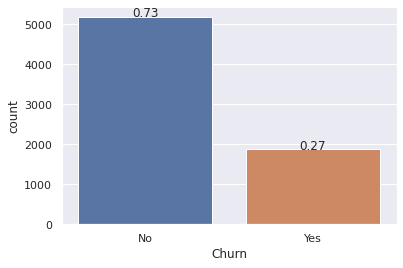

In [ ]:
# 타겟 변수의 분포를 살펴보기
sns.set_theme();
ac = sns.countplot(data.Churn);
for p in ac.patches:
    height = p.get_height()
    ac.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/len(data)),
            ha="center");

#### 불균형한 분포의 타겟
- Target 변수는 균등하게 분포되어 있지 않으며 고객의 26.54%만이 이탈했습니다. 따라서 우리 모델이 이 데이터 세트에서 학습하고 예측을 수행하는 경우 다수 클래스(이 경우 이탈되지 않은 고객)로 편향되어 소수 클래스를 무시할 가능성이 있습니다. 따라서 우리는 모델이 편향되어 학습하고 예측하도록 데이터 세트의 균형을 유지하고 더 나은 결과를 위해 두 클래스를 동등하게 처리해야 합니다.

#### SMOTE로 불균형 조정하는 방법
- SMOTE(Synthetic Minority Oversampling Technique)를 사용하여 대상 변수의 균형을 맞추는 방법이 있습니다. 훈련 데이터가 생성되면 SMOTE 알고리즘을 사용하여 소수 샘플(이 경우 'yes_churn'(변경하는 고객) 샘플을 업샘플링합니다. 
##### SMOTE:
1. 복사본을 만드는 대신 마이너 클래스( yes-churn)에서 합성 샘플(synthetic samples)을 만들어 작동합니다.
2. k-가장 가까운 이웃 중 하나를 무작위로 선택하고 이를 사용하여 유사하지만 무작위로 조정된 새로운 관측치(observations)를 생성합니다.

#### Baseline 모델 정하기
- 타겟의 최빈값인 no churn으로 정합니다.

#### 평가지표에는 recall, f1 score 가 적절하다
- Accuracy(정확도)는 불균형 데이터 세트의 유일한 지표로 사용되어서는 안 됩니다. 또한 기업에서는 이윤창출이 목적이므로 최대한 비용을 감소시켜야합니다. 
- 따라서 FN(이탈할 고객이지만 이탈하지 않는다고 잘못 예측한 고객들)이 최소화되는 것이 중요합니다. 따라서 Recall(재현율)이 적합한 평가지표입니다. 
- 동시에 f1 score은 recall(재현율)과 precision(정밀도)의 trade-off관계를 보안하는 평가지표이므로 같이 봅니다. 



In [ ]:
!pip install pandas-profiling==2.11.0

from pandas_profiling import ProfileReport
profile = ProfileReport(data, minimal=True).to_notebook_iframe()

     |████████████████████████████████| 243 kB 4.2 MB/s 
     |████████████████████████████████| 75 kB 4.0 MB/s 
     |████████████████████████████████| 3.1 MB 38.5 MB/s 
     |████████████████████████████████| 62 kB 765 kB/s 
     |████████████████████████████████| 675 kB 30.1 MB/s 
     |████████████████████████████████| 812 kB 40.0 MB/s 
     |████████████████████████████████| 28.5 MB 47 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=01ccf7cb995d31249396e475eaaf5f2619416568f74658f6b031a1cf8cf4d8b1
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=84d3d0918d02387a4943c9bea8228fa9041aa247e63d8564d6ba3f2e528afac7
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    F

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- TotalChages라는 컬럼이 문자열로 되어 있음을 확인
- 고객 이탈률에 영향을 미치지 않는 customerID 컬럼을 확인


In [ ]:
# 데이터 개요 보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# 함수를 통해 범주평 컬럼들의 고유값을 봅니다.

# 컬럼에 있는 고유값들을 볼 수 있는 함수입니다
def get_uniques(df, columns):
  return {column: list(df[column].unique()) for column in columns}

# dtype이 object인 범주형 데이터를 볼 수 있는 함수입니다.
def get_categorical_columns(df):
  return [column for column in df.columns if df.dtypes[column] == 'object']

In [ ]:
# 범주형 데이터의 고유값들을 볼 수 있는 함수입니다
get_uniques(data, get_categorical_columns(data))

{'Churn': ['No', 'Yes'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'Dependents': ['No', 'Yes'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'PaperlessBilling': ['Yes', 'No'],
 'Partner': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'PhoneService': ['No', 'Yes'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'TotalCharges': ['29.85',
  '1889.5',
  '108.15',
  '1840.75',
  '151.65',
  '820.5',
  '1949.4',
  '301.9',
  '3046.05',
  '3487.95',
  '587.45',
  '326.8',
  '5681.1',
  '5036.3',
  '2686.05',
  '7895.15',
  '1022.95',
  '7382.25',


In [ ]:
# 위에서 TotalCharges가 numeric이여야하는데 string으로 되어있는 것을 확인했습니다.
# TotalCharges의 고유값을 다시 sort해서 봅니다
sorted(data['TotalCharges'].unique())

# 아무것도 없는 빈칸이 있었음을 확인합니다.

[' ',
 '100.2',
 '100.25',
 '100.35',
 '100.4',
 '100.8',
 '100.9',
 '1001.2',
 '1001.5',
 '1003.05',
 '1004.35',
 '1004.5',
 '1004.75',
 '1005.7',
 '1006.9',
 '1007.8',
 '1007.9',
 '1008.55',
 '1008.7',
 '1009.25',
 '101.1',
 '101.45',
 '101.65',
 '101.9',
 '1010',
 '1011.05',
 '1011.5',
 '1011.8',
 '1012.4',
 '1013.05',
 '1013.2',
 '1013.35',
 '1013.6',
 '1014.25',
 '1016.7',
 '1017.35',
 '102.45',
 '102.5',
 '102.75',
 '1020.2',
 '1020.75',
 '1021.55',
 '1021.75',
 '1021.8',
 '1022.5',
 '1022.6',
 '1022.95',
 '1023.75',
 '1023.85',
 '1023.9',
 '1023.95',
 '1024',
 '1024.65',
 '1024.7',
 '1025.05',
 '1025.15',
 '1025.95',
 '1026.35',
 '1027.25',
 '1028.75',
 '1028.9',
 '1029.35',
 '1029.75',
 '1029.8',
 '103.7',
 '1031.1',
 '1031.4',
 '1031.7',
 '1032',
 '1032.05',
 '1033',
 '1033.9',
 '1033.95',
 '1035.5',
 '1035.7',
 '1036',
 '1036.75',
 '1037.75',
 '1039.45',
 '104.2',
 '104.3',
 '1041.8',
 '1042.65',
 '1043.3',
 '1043.35',
 '1043.4',
 '1043.8',
 '1045.25',
 '1046.1',
 '1046.2',
 

In [ ]:
# 빈칸을 NaN으로 바꿔주고 결측치를 다시 확인합니다
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.NaN)

data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# TotalCharges의 값들을 float로 바꿉니다.
data['TotalCharges'] = data['TotalCharges'].astype(np.float)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


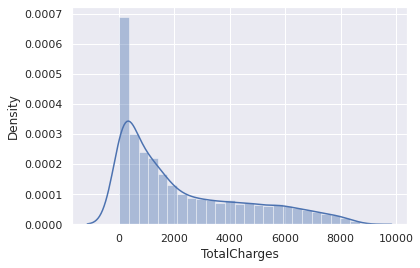

In [ ]:
sns.distplot(data['TotalCharges']);

- TotalCharges 컬럼의 분포가 Positively skewed 된 것을 볼 수 있습니다. 따라서 결측치를 중앙값(median)으로 바꿔줍니다.

In [ ]:
# 11개의 결측치를 TotalCharges의 median값으로 대체합니다
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [ ]:
# 범주형 데이터의 고유값들을 볼 수 있는 함수에 더이상 TotalCharges가 없는 것을 확인합니다
get_uniques(data, get_categorical_columns(data))

{'Churn': ['No', 'Yes'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'Dependents': ['No', 'Yes'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'PaperlessBilling': ['Yes', 'No'],
 'Partner': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'PhoneService': ['No', 'Yes'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'customerID': ['7590-VHVEG',
  '5575-GNVDE',
  '3668-QPYBK',
  '7795-CFOCW',
  '9237-HQITU',
  '9305-CDSKC',
  '1452-KIOVK',
  '6713-OKOMC',
  '7892-POOKP',
  '6388-TABGU',
  '9763-GRSKD',
  '7469-LKBCI',
  '8091-TTVAX',
  '0280-XJGEX

In [ ]:
# 데이터의 중복값을 확인합니다.
print('중복값의 수 :  ', data.customerID.duplicated().sum())

중복값의 수 :   0


In [ ]:
# 필요없는 컬럼인 customerID를 삭제합니다
# 이 데이터는 고객의 이탈 여부에 영향을 미치지 않기 때문입니다.
data = data.drop('customerID', axis=1)

In [ ]:
# 컬럼들의 고유값들을 정리하겠습니다.
# No phone service == No 이므로 바꿔줍니다
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')

# No internet service == No 이므로 바꿔줍니다
data[['OnlineBackup', 'OnlineSecurity', 'DeviceProtection', 
     'TechSupport', 'StreamingTV', 'StreamingMovies']] = data[['OnlineBackup', 'OnlineSecurity', 'DeviceProtection', 
                                                             'TechSupport', 'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [ ]:
# 범주형 데이터의 고유값들을 볼 수 있는 함수로 yes, no로 고유값이 설정된 것을 확인합니다.
get_uniques(data, get_categorical_columns(data))

{'Churn': ['No', 'Yes'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'Dependents': ['No', 'Yes'],
 'DeviceProtection': ['No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'MultipleLines': ['No', 'Yes'],
 'OnlineBackup': ['Yes', 'No'],
 'OnlineSecurity': ['No', 'Yes'],
 'PaperlessBilling': ['Yes', 'No'],
 'Partner': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'PhoneService': ['No', 'Yes'],
 'StreamingMovies': ['No', 'Yes'],
 'StreamingTV': ['No', 'Yes'],
 'TechSupport': ['No', 'Yes'],
 'gender': ['Female', 'Male']}

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


- 평균적으로 한달 서비스 비용을 64.76 달러로 지불하고 월별 가장 비싼 요금은 118.75 달러 입니다.
- 가장 저렴한 월별 요금은 18.25 달러 입니다.

## (3) 데이터 시각화

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

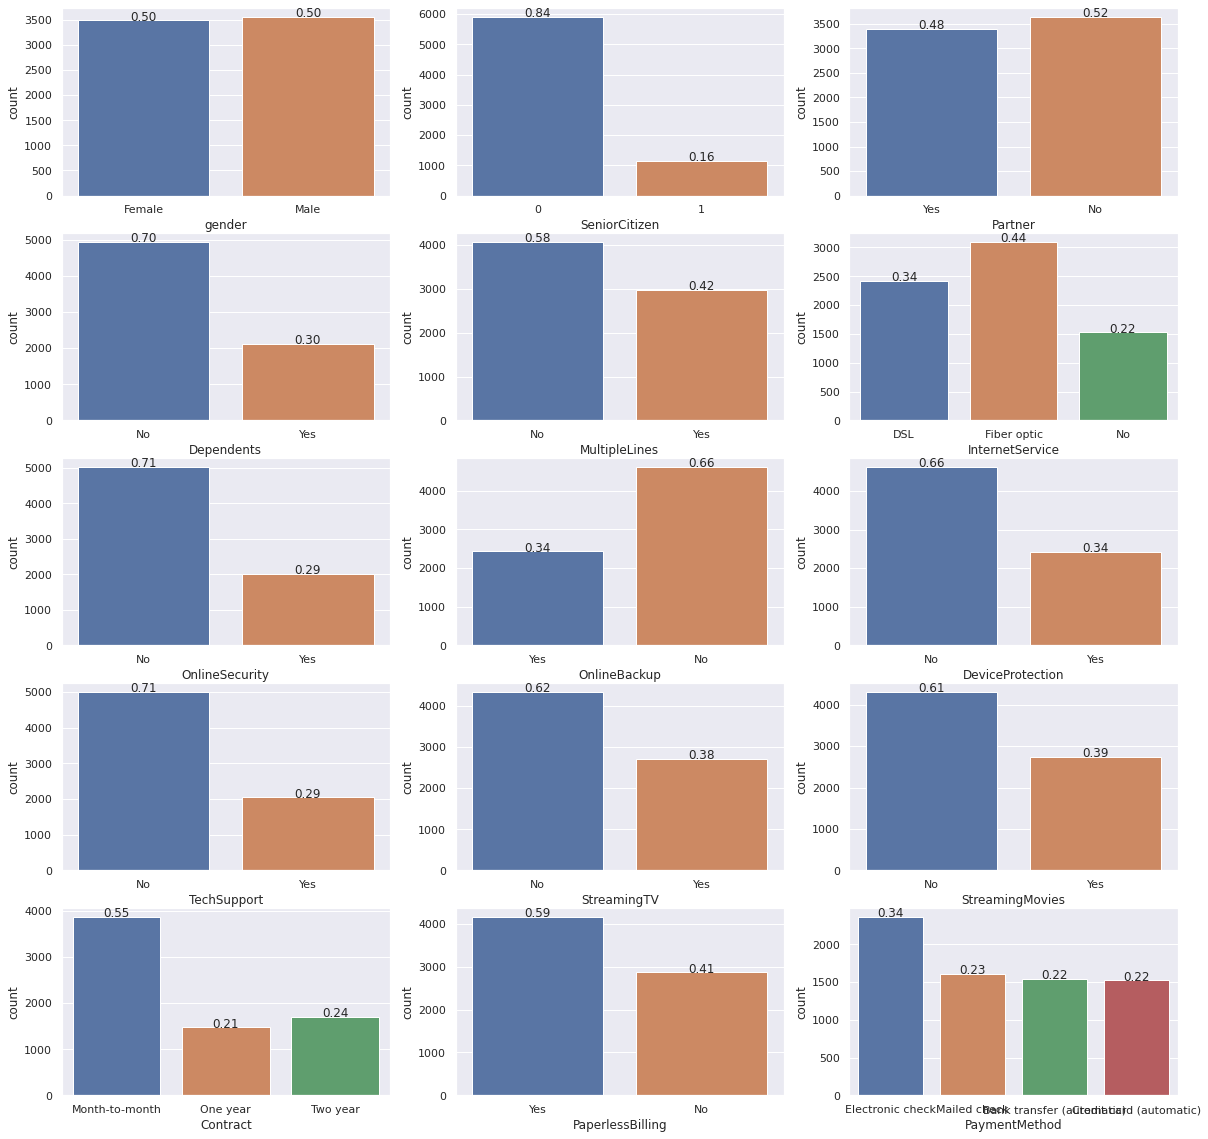

In [ ]:
### Countplots for categorical features ###
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
fig,ax = plt.subplots(5,3,figsize=(20,20))
sns.set_style("dark")
categorical = ["gender","SeniorCitizen","Partner","Dependents","MultipleLines","InternetService",\
               "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",\
               "Contract","PaperlessBilling","PaymentMethod","PhoneService","Churn"]
k = 0
for i in range(5):
    for j in range(3):
        ac = sns.countplot(data[categorical[k]],ax=ax[i][j])
        for p in ac.patches:
            height = p.get_height()
            ac.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height/len(data)),
                    ha="center") 
        k+=1

- 'gender'에서 남성과 여성의 비율이 거의 같습니다.
- 'Partner'에서 파트너가 있고 없고의 비율이 거의 비슷합니다.

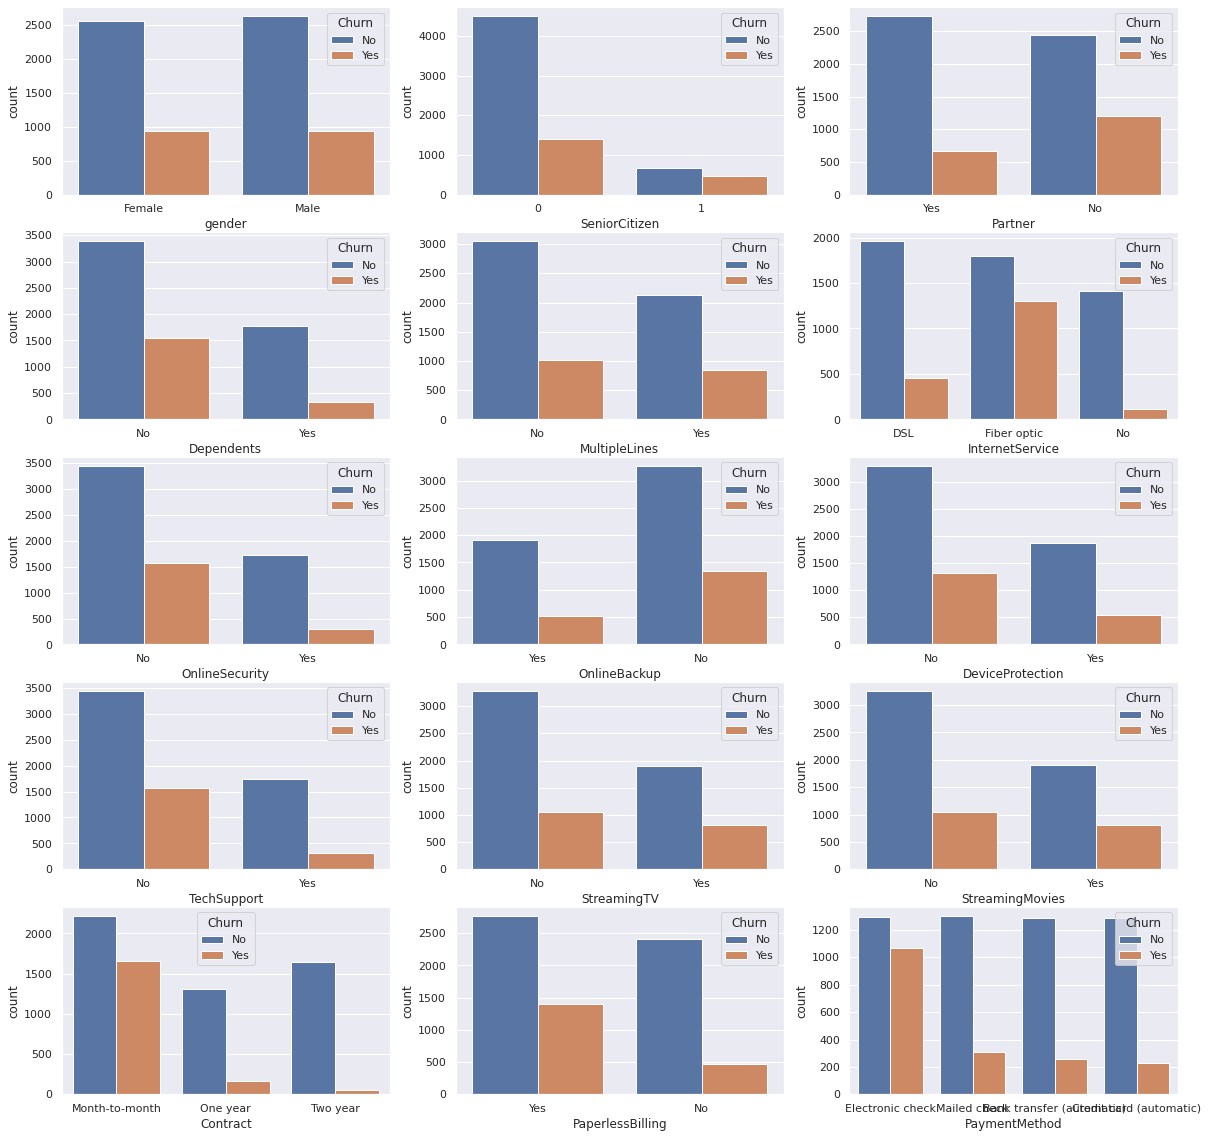

In [ ]:
# 고객 이탈에 따른 컬럼별 시각화입니다
sns.set_theme()
fig,ax = plt.subplots(5,3,figsize=(20,20))
sns.set_style("dark")
k = 0
for i in range(5):
    for j in range(3):
        ac = sns.countplot(data = data,x=data[categorical[k]],hue="Churn",ax=ax[i][j])
         
        k+=1

- 성별: 남성과 여성의 이탈률에는 거의 차이가 없습니다. 따라서 "성별에 따라서 고객의 이탈하는 정도에 차이가 있을까?"란 가설에는 "차이가 없다"는 결론을 얻을 수 있습니다.
- 고령자: 고령자 고객의 이탈률이 40% 이상으로 해당 그룹에서 이탈할 가능성이 높음을 나타냅니다. 
- 파트너: 단일 고객은 파트너가 있는 고객보다 이탈할 가능성이 더 큽니다. 
- 부양 가족: 부양 가족이 있는 고객은 부양 가족이 없는 고객보다 이탈할 가능성이 적습니다.
- 인터넷 서비스에서 광섬유(fiber optic)에 대한 이탈률이 훨씬 높습니다.('DSL', 'No'에 비교할 때)
- OnlineSecurity, TechSupport 등과 같은 지원 서비스를 사용하지 않을 때 이탈률이 높습니다. 
- MultipleLines, StreamingTV, StreamingMovies와 같은 일부 서비스를 사용하거나 사용하지 않는 것이 Churn에 거의 동일한 영향을 미치는 것으로 보입니다.

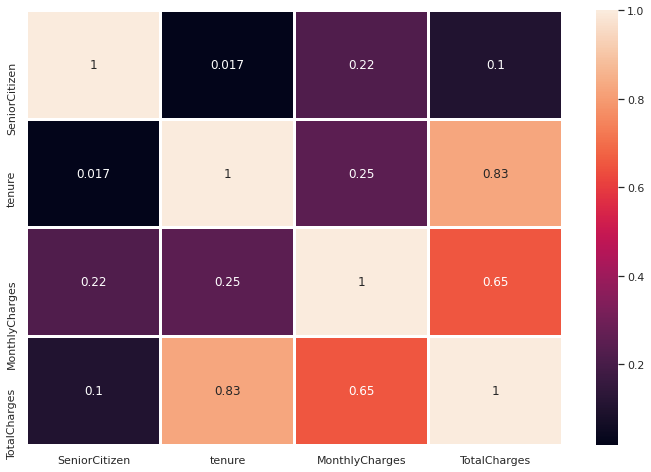

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(data.corr(), annot=True, linewidths = 2)
plt.show()


- Heat Map에서 볼 수 있듯이 'tenure'과 'TotalCharges' 사이에는 높은 상관관계가 있습니다.
또 다른 주목할만한 상관관계는 'MonthlyCharges'와 'TotalCharges' 사이입니다. 
- 이는 'TotalCharges'가 결국 'tenure'과 'MonthlyCharges'의 곱(+세금 등)한 값이라는 가설을 뒷받침해줍니다.

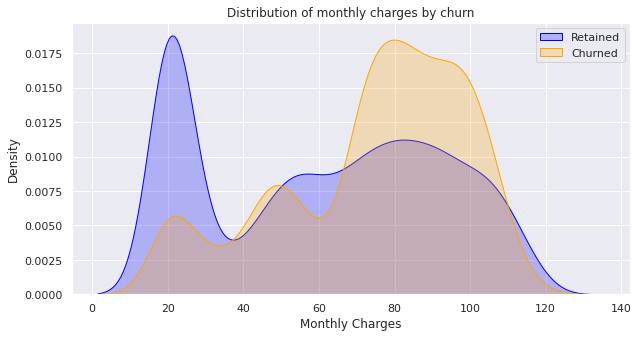

In [ ]:
%matplotlib inline
sns.set_style('darkgrid')

plt.figure(figsize=(10,5))
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Blue", shade = True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Orange", shade= True)
ax.legend(["Retained","Churned"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
plt.show()

이탈한 많은 고객들(Churend)은 월간 요금으로 60달러 이상을 지불하고 있는 반면 유지 고객(Retained)에서 가장 널리 사용되는 월간 요금 그룹은 월간 약 20달러를 지출하고 있음을 알 수 있습니다.

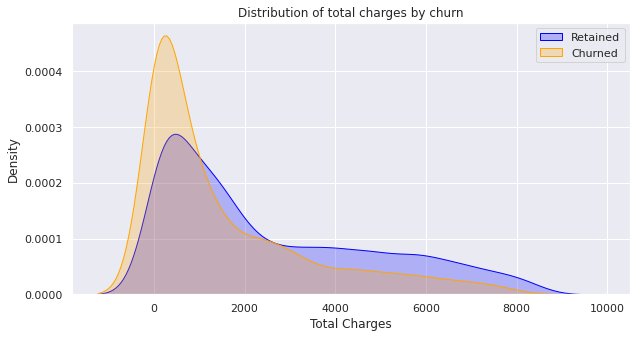

In [ ]:
%matplotlib inline
sns.set_style('darkgrid')

plt.figure(figsize=(10,5))
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Blue", shade = True)
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Orange", shade= True)
ax.legend(["Retained","Churned"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')
plt.show()

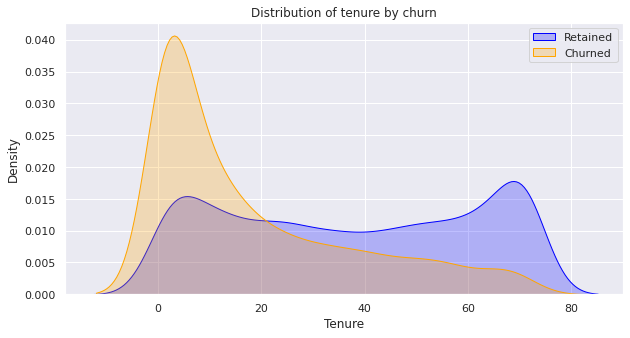

In [ ]:
%matplotlib inline
sns.set_style('darkgrid')

plt.figure(figsize=(10,5))
ax = sns.kdeplot(data.tenure[(data["Churn"] == 'No') ],
                color="Blue", shade = True)
ax = sns.kdeplot(data.tenure[(data["Churn"] == 'Yes') ],
                ax =ax, color="Orange", shade= True)
ax.legend(["Retained","Churned"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of tenure by churn')
plt.show()

- 약 10개월 미만의 tenure를 갖는 고객들이 훨씬 더 많이 이탈합니다. tenure가 60개월 이상인 사람들은 더 많이 유지됩니다.

## (4) 인코딩


In [ ]:
# features 를 3 종류로 나눠줍니다(각각 다르게 인코딩하기위해)
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

# PaymentMethod 에는 순서가 없기때문에 nominal로 분류합니다
nominal_features = ['PaymentMethod', 'InternetService', 'Contract']

target_column = 'Churn'

In [ ]:
# binary features encoding function
def binary_encode(df, column, positive_value):
  df = df.copy()
  df[column] = df[column].apply(lambda x : 1 if x == positive_value else 0)
  return df

# nominal features encoding function
def onehot_encode(df, column):
  df = df.copy()
  dummies = pd.get_dummies(df[column])
  df = pd.concat([df, dummies], axis = 1)
  df = df.drop(column, axis = 1)
  return df


In [ ]:
# 위에서 정의한 encoding functions 을 적용합니다
data = binary_encode(data, 'gender', 'Male')

yes_features = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for feature in yes_features: 
  data = binary_encode(data, feature, 'Yes')

data = onehot_encode(data, 'PaymentMethod')
data = onehot_encode(data, 'InternetService')
data = onehot_encode(data, 'Contract')

In [ ]:
# target column 인 churn 을 인코딩합니다
data = binary_encode(data, 'Churn', 'Yes')

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,DSL,Fiber optic,No,Month-to-month,One year,Two year
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,1,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,1,1,0,0,1,0,0
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0,0,1,0,1,0,0


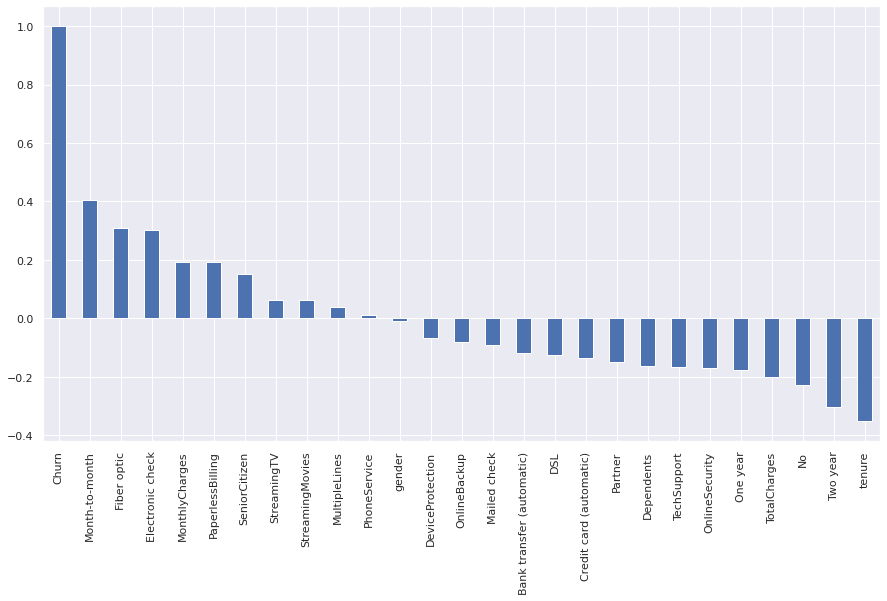

In [ ]:
%matplotlib inline
sns.set_style('darkgrid')

plt.figure(figsize=(15,8))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

- 위의 그래프를 통해 타겟과 피쳐들의 상관관계를 알 수 있습니다. 이를 통해 타겟에 가장 영향을 많이 끼치는 것을 month-to-month 임을 알 수 있습니다. 그리고 gender 이하의 피쳐들을 타겟에 주는 영향이 0이하임을 알 수 있습니다. 

### (5) 프로젝트 질문
- Data Leakage : 현재로서는 데이터 누수가 발생하지 않았다고 볼 수 있습니다.
- 모델의 한계 : 모든 특성의 성능을 보고자 특성을 따로 drop하지 않았습니다. 따라서 과적합의 위험이 있다는 한계가 있습니다.

# 4. 머신러닝 방식 적용 및 교차검증

In [ ]:
# 데이터를 스케일링해줍니다
cols_to_scale = ['tenure','MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [ ]:
# 데이터를 train, validation, test 로 나누어줍니다.
target = 'Churn'
train, test = train_test_split(data,test_size=0.2)
train, val = train_test_split(train,test_size=0.2)

train.shape , val.shape , test.shape

((4507, 27), (1127, 27), (1409, 27))

In [ ]:
target = 'Churn'

X = lambda df:df.drop(target,axis=1)
y = lambda df:df[target]

In [ ]:
X_train,y_train = X(train),y(train)
X_val,y_val = X(val),y(val)
X_test,y_test = X(test),y(test)

## (1) Modeling


### Logistic Regression


---



In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(max_iter=1000,random_state=4)
logistic.fit(X_train, y_train)
logistic.score(X_val, y_val)

0.805678793256433

### Decision Tree


---



In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=4, criterion='entropy')
decision_tree.fit(X_train,y_train)
decision_tree.score(X_val,y_val)

0.7444543034605147

### Random Forest


---



In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_jobs=-1, random_state=4, oob_score=True)
random_forest.fit(X_train,y_train)
random_forest.score(X_val,y_val)

0.8047914818101154

### Xgboost


---



In [ ]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight

## Compute `class_weights` using sklearn
cls_weight = (y_train.shape[0] - np.sum(y_train)) / np.sum(y_train)

xgb_clf = XGBClassifier(learning_rate=0.01, random_state=0, scale_pos_weight=cls_weight, n_jobs=-1)
xgb_clf.fit(X_train, y_train);
xgb_clf.score(X_val, y_val)

0.7391304347826086

### Cat Boost


---



In [ ]:
from catboost import CatBoostClassifier

catboost_clf = CatBoostClassifier( auto_class_weights='Balanced')
catboost_clf.fit(X_train, y_train)
catboost_clf.score(X_val, y_val)

Learning rate set to 0.019595
0:	learn: 0.6846080	total: 52.6ms	remaining: 52.6s
1:	learn: 0.6762360	total: 56.4ms	remaining: 28.2s
2:	learn: 0.6681874	total: 60.2ms	remaining: 20s
3:	learn: 0.6607553	total: 64ms	remaining: 15.9s
4:	learn: 0.6540027	total: 67.8ms	remaining: 13.5s
5:	learn: 0.6464341	total: 71.6ms	remaining: 11.9s
6:	learn: 0.6397456	total: 75.4ms	remaining: 10.7s
7:	learn: 0.6332270	total: 79.2ms	remaining: 9.82s
8:	learn: 0.6269145	total: 82.9ms	remaining: 9.13s
9:	learn: 0.6205490	total: 86.8ms	remaining: 8.59s
10:	learn: 0.6162113	total: 94.1ms	remaining: 8.46s
11:	learn: 0.6127437	total: 98.1ms	remaining: 8.07s
12:	learn: 0.6075631	total: 102ms	remaining: 7.74s
13:	learn: 0.6029549	total: 106ms	remaining: 7.48s
14:	learn: 0.5988311	total: 110ms	remaining: 7.23s
15:	learn: 0.5943723	total: 114ms	remaining: 7.01s
16:	learn: 0.5908156	total: 118ms	remaining: 6.82s
17:	learn: 0.5872099	total: 122ms	remaining: 6.66s
18:	learn: 0.5829777	total: 126ms	remaining: 6.5s
19:	

0.7613132209405501

### KNN(k-nearest neighbor)


---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_val, y_val)

0.7320319432120674

점수가 높은 Logistic 모델과 Random Forest모델을 최종 모델 후보로 선정합니다.

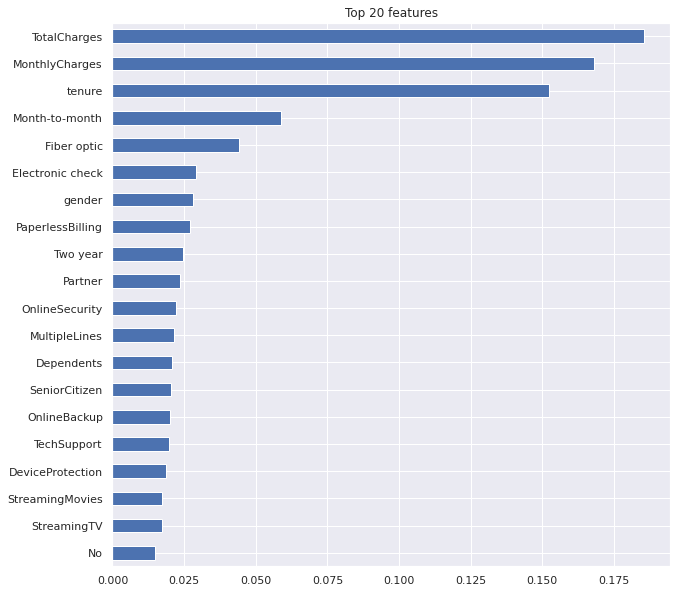

In [ ]:
importances = pd.Series(random_forest.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

## Hyperparameter tuning


검증셋과 훈련셋을 합쳐서 train,test로만 분류합니다

In [ ]:
X_train = pd.concat([X_train,X_val])
y_train = pd.concat([y_train,y_val])
X_train.shape , y_train.shape

((5634, 26), (5634,))

### Logistic Regression


---



Fitting 4 folds for each of 170 candidates, totalling 680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 677 out of 680 | elapsed:   36.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 680 out of 680 | elapsed:   36.3s finished


<Figure size 576x360 with 0 Axes>

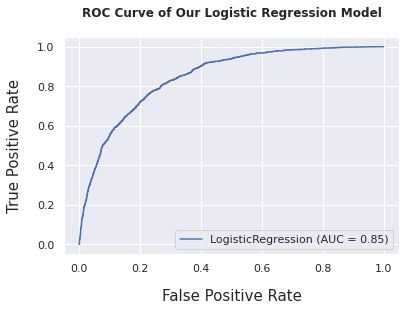

최적 하이퍼파라미터:  {'max_iter': 1000, 'class_weight': 'l', 'C': 20}
Recall :  0.5498017664653762


In [ ]:
# Import packages
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_randfloat 
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold


dists = {
    'C': list(range(10,100,10))+[0.001,0.1,1,10,1000], 
    'class_weight': 'balanced',
    'max_iter':(50,500,1000,2000,3000),
}

logistic_clf = RandomizedSearchCV(
    LogisticRegression(), 
    param_distributions=dists, 
    n_iter=170, 
    cv=4, 
    scoring='recall',  
    verbose=1,
    n_jobs=-1
)

logistic_clf.fit(X_train, y_train);

# Print ROC Curve
plt.figure(figsize=(8,5))
metrics.plot_roc_curve(logistic_clf.best_estimator_, X_train, y_train)
plt.title('ROC Curve of Our Logistic Regression Model', pad=20, fontweight='bold')
plt.xlabel('False Positive Rate', labelpad=15, fontsize=15)
plt.ylabel('True Positive Rate', labelpad=15, fontsize=15)
plt.show()

# Print results of hyperparameter tuning
print('최적 하이퍼파라미터: ', logistic_clf.best_params_)
print('Recall : ', logistic_clf.best_score_)

Fitting 4 folds for each of 170 candidates, totalling 680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 680 out of 680 | elapsed:   33.6s finished


<Figure size 576x360 with 0 Axes>

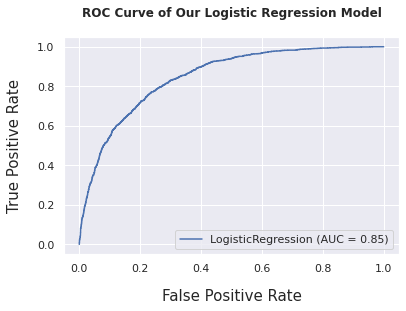

최적 하이퍼파라미터:  {'max_iter': 2000, 'class_weight': 'd', 'C': 1}
F1 score :  0.5982833158658629


In [ ]:
dists = {
    'C': list(range(10,100,10))+[0.001,0.1,1,10,1000], 
    'class_weight': 'balanced',
    'max_iter':(50,500,1000,2000,3000),
}

logistic_clf = RandomizedSearchCV(
    LogisticRegression(), 
    param_distributions=dists, 
    n_iter=170, 
    cv=4, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)

logistic_clf.fit(X_train, y_train);

# Print ROC Curve
plt.figure(figsize=(8,5))
metrics.plot_roc_curve(logistic_clf.best_estimator_, X_train, y_train)
plt.title('ROC Curve of Our Logistic Regression Model', pad=20, fontweight='bold')
plt.xlabel('False Positive Rate', labelpad=15, fontsize=15)
plt.ylabel('True Positive Rate', labelpad=15, fontsize=15)
plt.show()

# Print results of hyperparameter tuning
print('최적 하이퍼파라미터: ', logistic_clf.best_params_)
print('F1 score : ', logistic_clf.best_score_)

### RandomForest


---



Fitting 4 folds for each of 170 candidates, totalling 680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 680 out of 680 | elapsed: 23.9min finished


<Figure size 576x360 with 0 Axes>

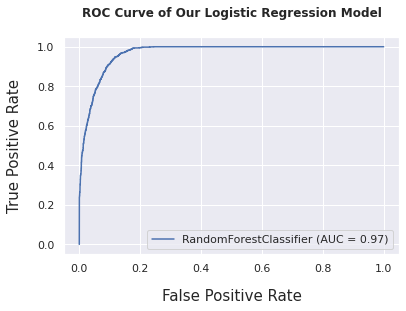

최적 하이퍼파라미터:  {'max_depth': 10, 'max_features': 0.4272451774181959, 'n_estimators': 280}
Recall :  0.5265639990970146


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor



pipe = make_pipeline( 
    RandomForestRegressor(random_state=2)
)

dists = {
    'n_estimators': randint(200, 500), 
    'max_depth': [5, 10, 15, 20, 30,50], 
    'max_features': uniform(0, 1) # max_features
}

forest_clf = RandomizedSearchCV(
    RandomForestClassifier(), 
    param_distributions=dists, 
    n_iter=170, 
    cv=4, 
    scoring='recall',  
    verbose=1,
    n_jobs=-1
)

forest_clf.fit(X_train, y_train);

# Print ROC Curve
plt.figure(figsize=(8,5))
metrics.plot_roc_curve(forest_clf.best_estimator_, X_train, y_train)
plt.title('ROC Curve of Our Logistic Regression Model', pad=20, fontweight='bold')
plt.xlabel('False Positive Rate', labelpad=15, fontsize=15)
plt.ylabel('True Positive Rate', labelpad=15, fontsize=15)
plt.show()

# Print results of hyperparameter tuning
print('최적 하이퍼파라미터: ', forest_clf.best_params_)
print('Recall : ', forest_clf.best_score_)

Fitting 4 folds for each of 170 candidates, totalling 680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 680 out of 680 | elapsed: 23.2min finished


<Figure size 576x360 with 0 Axes>

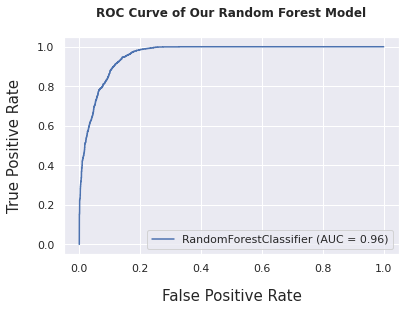

최적 하이퍼파라미터:  {'max_depth': 10, 'max_features': 0.302278080625234, 'n_estimators': 235}
F1 score :  0.586268389781788


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier



pipe = make_pipeline( 
    RandomForestRegressor(random_state=2)
)

dists = {
    'n_estimators': randint(200, 500), 
    'max_depth': [5, 10, 15, 20, 30,50], 
    'max_features': uniform(0, 1) # max_features
}

forest_clf = RandomizedSearchCV(
    RandomForestClassifier(), 
    param_distributions=dists, 
    n_iter=170, 
    cv=4, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)

forest_clf.fit(X_train, y_train);

# Print ROC Curve
plt.figure(figsize=(8,5))
metrics.plot_roc_curve(forest_clf.best_estimator_, X_train, y_train)
plt.title('ROC Curve of Our Random Forest Model', pad=20, fontweight='bold')
plt.xlabel('False Positive Rate', labelpad=15, fontsize=15)
plt.ylabel('True Positive Rate', labelpad=15, fontsize=15)
plt.show()

# Print results of hyperparameter tuning
print('최적 하이퍼파라미터: ', forest_clf.best_params_)
print('F1 score : ', forest_clf.best_score_)

### SMOTE RandomForest 
*SMOTE == Synthetic Minority Oversampling TEchnique 
- 소수 집단에서 무작위로 한 점을 선택합니다.
- 이 점에 대한  k-nearest neighbors(일부 사전 지정된 k에 대해)을 계산합니다.
- 선택한 점과 각 인접 점 사이에 k개의 새 점을 추가합니다.

In [ ]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [ ]:
oversample = SMOTE()
X1, y1 = oversample.fit_resample(X,y)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split( X1, y1, test_size=0.33, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Fitting 4 folds for each of 170 candidates, totalling 680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 680 out of 680 | elapsed: 28.8min finished


<Figure size 576x360 with 0 Axes>

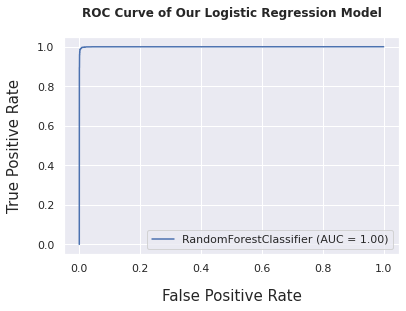

최적 하이퍼파라미터:  {'max_depth': 20, 'max_features': 0.04756877283534289, 'n_estimators': 309}
F1 score :  0.8459377220756519


In [ ]:
pipe = make_pipeline( 
    RandomForestRegressor(random_state=2)
)

dists = {
    'n_estimators': randint(200, 500), 
    'max_depth': [5, 10, 15, 20, 30,50], 
    'max_features': uniform(0, 1) # max_features
}

forest_clf = RandomizedSearchCV(
    RandomForestClassifier(), 
    param_distributions=dists, 
    n_iter=170, 
    cv=4, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)

forest_clf.fit(X_train_smote, y_train_smote);

# Print ROC Curve
plt.figure(figsize=(8,5))
metrics.plot_roc_curve(forest_clf.best_estimator_, X_train_smote, y_train_smote)
plt.title('ROC Curve of Our Smote Random Forest Model', pad=20, fontweight='bold')
plt.xlabel('False Positive Rate', labelpad=15, fontsize=15)
plt.ylabel('True Positive Rate', labelpad=15, fontsize=15)
plt.show()

# Print results of hyperparameter tuning
print('최적 하이퍼파라미터: ', forest_clf.best_params_)
print('F1 score : ', forest_clf.best_score_)

Fitting 4 folds for each of 170 candidates, totalling 680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 680 out of 680 | elapsed: 27.0min finished


<Figure size 576x360 with 0 Axes>

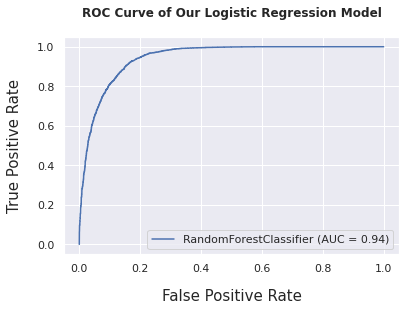

최적 하이퍼파라미터:  {'max_depth': 10, 'max_features': 0.07124430684113836, 'n_estimators': 394}
Recall :  0.8748551564310544


In [ ]:
pipe = make_pipeline( 
    RandomForestRegressor(random_state=2)
)

dists = {
    'n_estimators': randint(200, 500), 
    'max_depth': [5, 10, 15, 20, 30,50], 
    'max_features': uniform(0, 1) # max_features
}

forest_clf = RandomizedSearchCV(
    RandomForestClassifier(), 
    param_distributions=dists, 
    n_iter=170, 
    cv=4, 
    scoring='recall',  
    verbose=1,
    n_jobs=-1
)

forest_clf.fit(X_train_smote, y_train_smote);

# Print ROC Curve
plt.figure(figsize=(8,5))
metrics.plot_roc_curve(forest_clf.best_estimator_, X_train_smote, y_train_smote)
plt.title('ROC Curve of Our Smote Random Forest Model', pad=20, fontweight='bold')
plt.xlabel('False Positive Rate', labelpad=15, fontsize=15)
plt.ylabel('True Positive Rate', labelpad=15, fontsize=15)
plt.show()

# Print results of hyperparameter tuning
print('최적 하이퍼파라미터: ', forest_clf.best_params_)
print('Recall : ', forest_clf.best_score_)

### 최종 모델의 test점수(recall)
recall과 f1 score 점수가 높은 Random Forest 모델을 최종 모델로 합니다.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

random_forest = forest_clf.best_estimator_
logistic = logistic_clf.best_estimator_

random_forest_pred = random_forest.predict(X_test)
random_forest_pred1 = random_forest.predict(X_test_smote)
logistic_pred = logistic.predict(X_test)

random_forest_accuracy = accuracy_score(y_test,random_forest_pred)
smote_random_forest_accuracy = accuracy_score(y_test_smote,random_forest_pred1)
logistic_accuracy = accuracy_score(y_test,logistic_pred)

random_forest_recall = recall_score(y_test,random_forest_pred)
smote_random_forest_recall = recall_score(y_test_smote,random_forest_pred1)
logistic_recall = recall_score(y_test,logistic_pred)

random_forest_f1 = f1_score(y_test,random_forest_pred)
smote_random_forest_f1 = f1_score(y_test_smote,random_forest_pred1)
logistic_f1 = f1_score(y_test,logistic_pred)

print(f'Random Forest Accuracy:{random_forest_accuracy:.4f} ,Smote Random Forest Accuracy:{smote_random_forest_accuracy:.4f}, Logistic Accuracy:{logistic_accuracy:.4f}')
print(f'Random Forest Recall:{random_forest_recall:.4f} , Smote Random Forest Recall:{smote_random_forest_recall:.4f}, Logistic Recall:{logistic_recall:.4f}')
print(f'Random Forest f1:{random_forest_f1:.4f} , Smote Random Forest f1:{smote_random_forest_f1:.4f}, Logistic f1:{logistic_f1:.4f}')

Random Forest Accuracy:0.8105 ,Smote Random Forest Accuracy:0.8269, Logistic Accuracy:0.7935
Random Forest Recall:0.8385 , Smote Random Forest Recall:0.8885, Logistic Recall:0.5156
Random Forest f1:0.7069 , Smote Random Forest f1:0.8381, Logistic f1:0.5764


### baseline 모델과 비교

학습한 모델은 BaseLine 모델에 비해 유의미하게 높은 정확도를 보입니다.

In [ ]:
baseline = [ 0 for _ in range(len(y_test)) ]
accuracy_score(y_test,baseline)

0.7423704755145494

### 프로젝트 질문
- Baseline 모델의 accuracy 인 0.74보다 모두 높은 accuracy 값을 가집니다.
- 모델 성능개선을 위해 SMOTE 샘플링방법을 사용했습니다. 타겟값이 불균형했기 때문입니다.
- 최종모델은 random forest로 정했습니다. (SMOTE를 사용한 랜덤 포레스트는 너무 많은 학습시간이 걸려서 이번에는 선택하지 않기로합니다. 이또한 실제 현장에서의 시간과 비용의 한계가 있음을 감안했을 때 충분히 있을 수 있는 경우라고 생각했습니다.)

# 5. 머신러닝 모델 해석

## (1) Permutation Importance


In [ ]:
import warnings 
warnings.filterwarnings("ignore")

import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
# 1. Permutation Importances
permuter = PermutationImportance(
    forest_clf, 
    scoring='recall', 
    n_iter=5, 
    random_state=42
)

# permutor 에 fit 하기
permuter.fit(X_test,y_test)

# 특성 중요도 담기
feature_names = X_test.columns.tolist()

# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names)

Weight,Feature
0.1851 ± 0.0273,Month-to-month
0.1846 ± 0.0340,tenure
0.1592 ± 0.0192,Fiber optic
0.1295 ± 0.0174,MonthlyCharges
0.0518 ± 0.0088,TotalCharges
0.0386 ± 0.0126,DSL
0.0353 ± 0.0128,Two year
0.0259 ± 0.0154,Electronic check
0.0253 ± 0.0095,No
0.0226 ± 0.0081,PaperlessBilling


- 거의 대부분의 피쳐들이 타겟에 영향을 준다는 것을 알 수 있습니다.
- 특히 Month-to-month(Contract), tenure, Fiber optic(InternetService), MonthlyCHarges 등이 타겟에 큰 영향을 미치는 것을 알 수 있습니다.

## (2) PDP

In [ ]:
!pip install pdpbox
import pdpbox

     |████████████████████████████████| 34.0 MB 39 kB/s 
     |████████████████████████████████| 13.1 MB 6.5 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=64f69e65d5c2a50e968da5964b622377fc9826f44d75d049954b9d3c6157833b
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 2.11.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# dpi(dots per inch) 수치를 조정해 이미지 화질을 조정 할 수 있습니다
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

In [ ]:
from pdpbox.pdp import pdp_isolate 
from pdpbox.pdp import pdp_plot

In [ ]:
def pdp(feature):
    isolated = pdp_isolate(
        model= forest_clf, 
        dataset=X_test, 
        model_features=X_test.columns, 
        feature=feature,
    )
    pdp_plot(isolated, feature_name=feature);

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


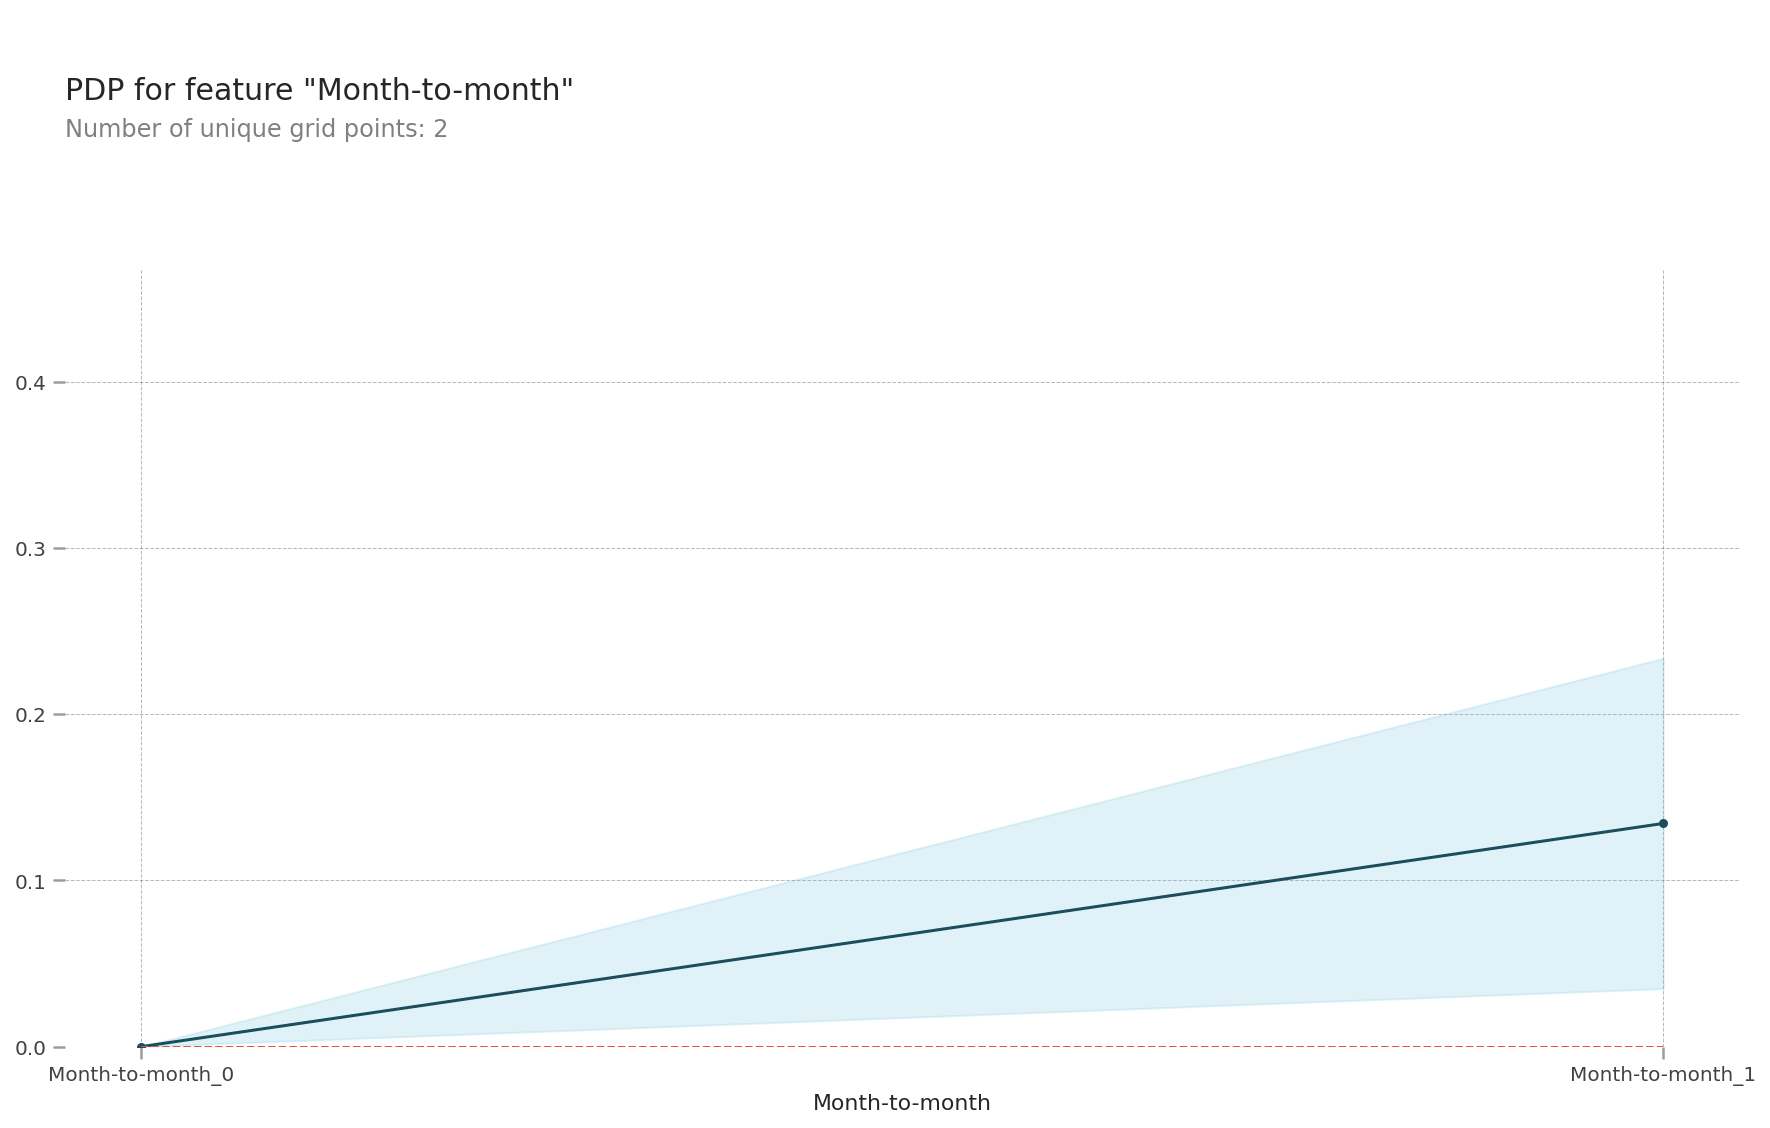

In [ ]:
pdp('Month-to-month');

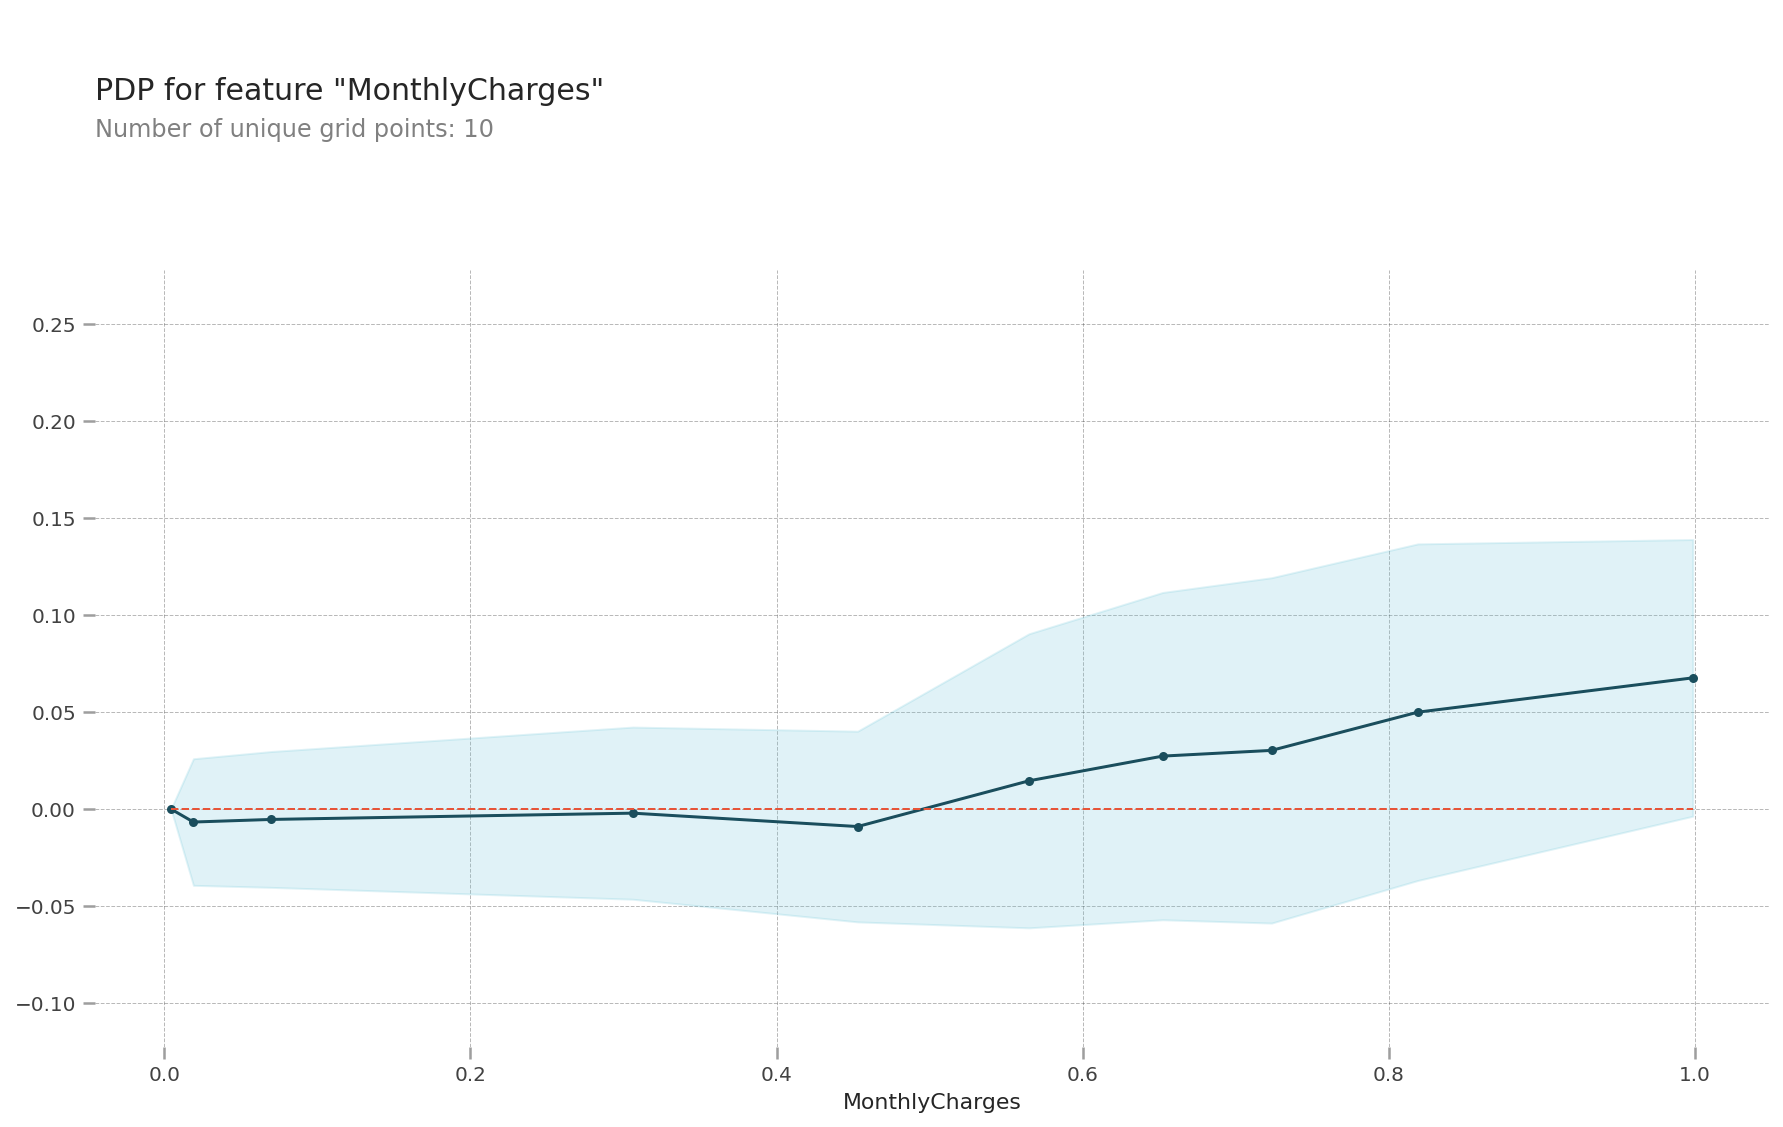

In [ ]:
pdp('MonthlyCharges');

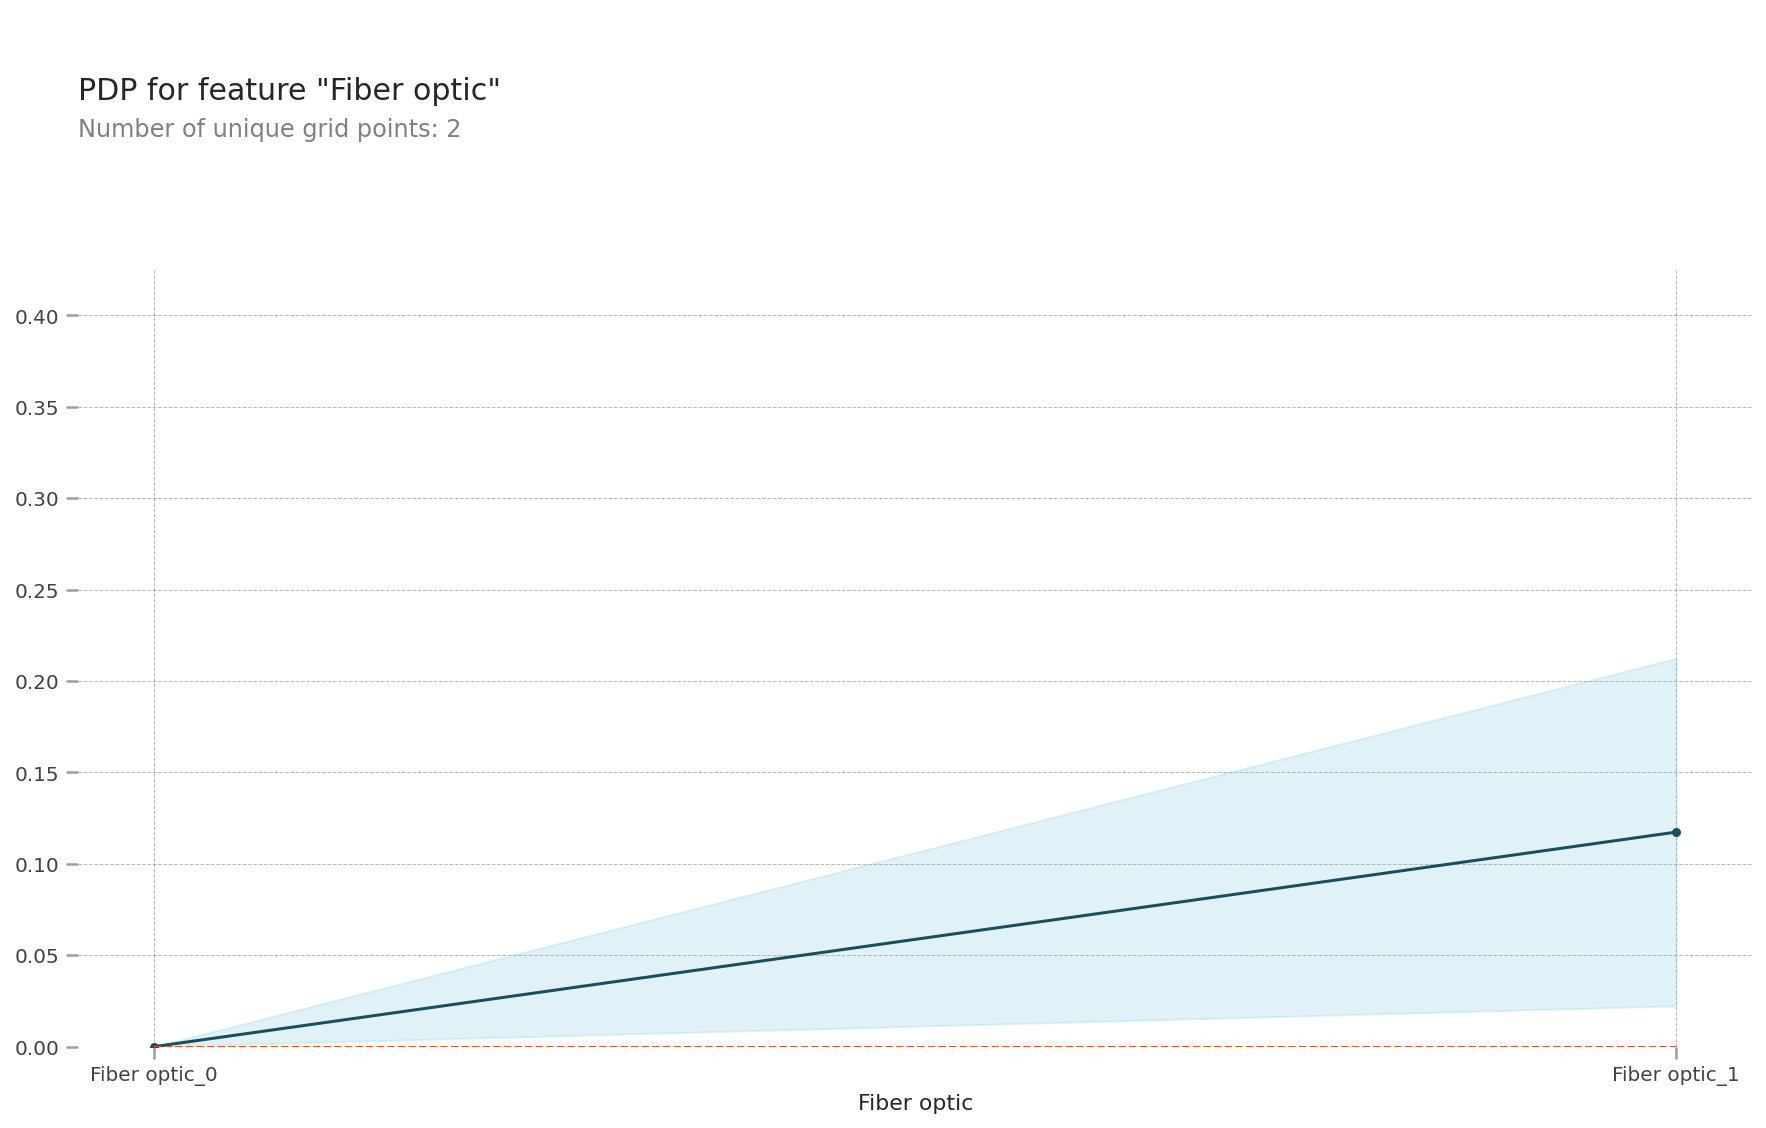

In [ ]:
pdp('Fiber optic');

- permutation imporatance 에서 타겟에 영향을 많이 줬던 3개의 피쳐를 pdp plot으로 나타내었습니다.
- 특성들을 선형적으로 바꿔서 한 눈에 특성에 따른 타겟의 증감을 한 눈에 볼 수 있습니다.
- Month-to-month, MonthlyCharges, Fiber optic 모두 각 특성들이 증가함에따라 특성에 영향을 주고 있다는 것을 알 수 있습니다.

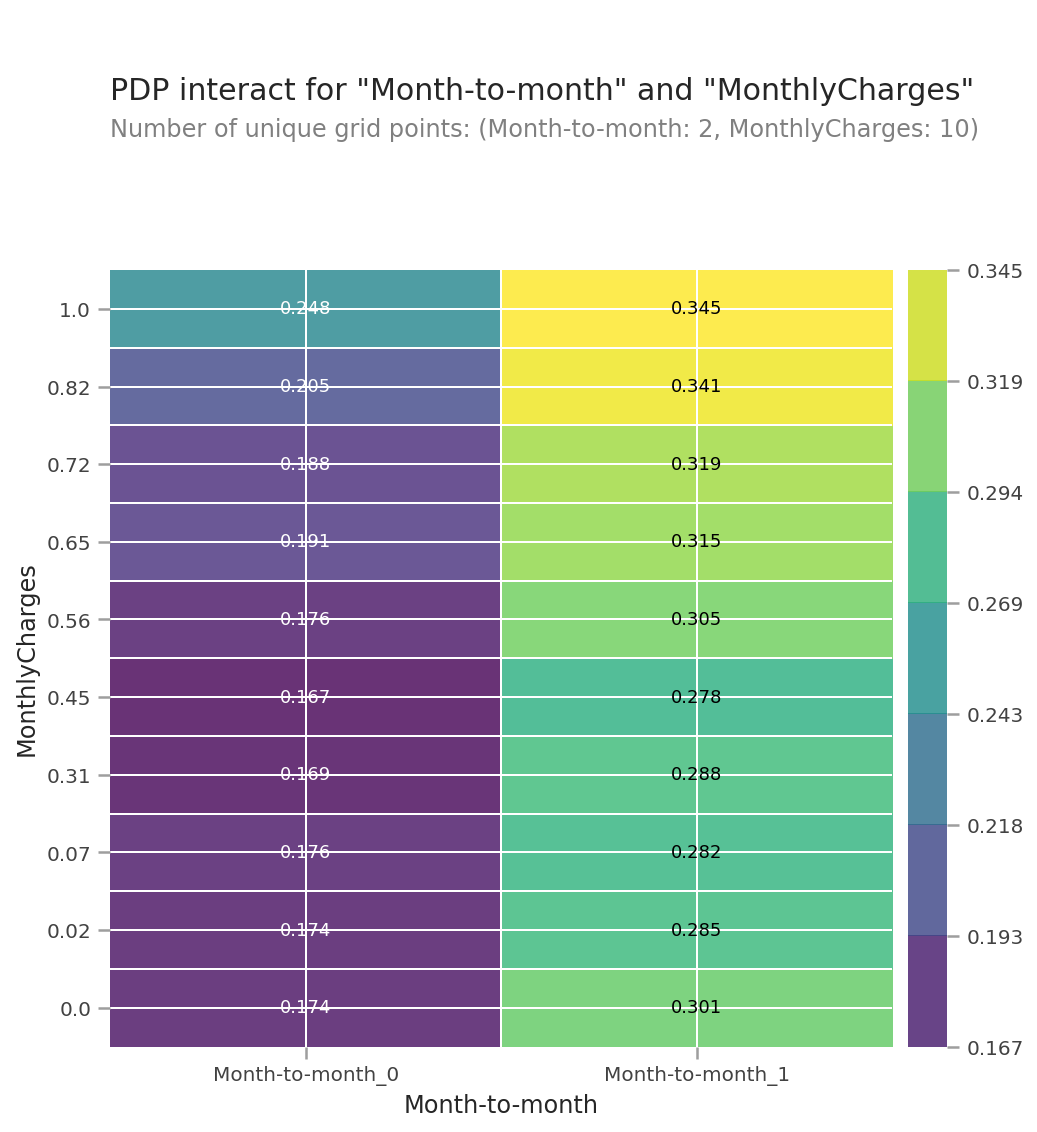

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Month-to-month', 'MonthlyCharges']

interaction = pdp_interact(
    model= forest_clf, 
    dataset=X_test,
    model_features=X_test.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

- pdp interaction 으로 Month-to-month와 MonthlyCharges의 관계를 나타냅니다.
- Month-to-month는 MonthlyCharges가 클때 모델에 큰 영향을 끼치는 것을 알 수 있습니다.
- 즉 Month-to-month 고객은 MonthlyCharges가 클 때 이탈하는 경향이 있습니다.

## (3) Shap

In [ ]:
!pip install shap
import shap

     |████████████████████████████████| 356 kB 4.0 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491652 sha256=86e16c95e36243c9f375e73887dcde637a8003ce6936c25f3a1397bc7fda0bc9
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap

# load JS visualization code to notebook
shap.initjs()

explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

Output hidden; open in https://colab.research.google.com to view.

- shap은 블랙박스로 보이는 모델을 투명하게해서 그 안에서 어떤 특성들이 어떤 방향으로 예측값에 영향을 주는지를 시각적으로 보여줍니다.
- 데이터 샘플 하나만을 설명한다는 점에서 pdp plot 와 특성 중요도와는 다릅니다.
- 여러가지 shap plot 으로 각 특성이 어떤 값 범위에서 어떤 영향을 주는지 확인할 수 있습니다.

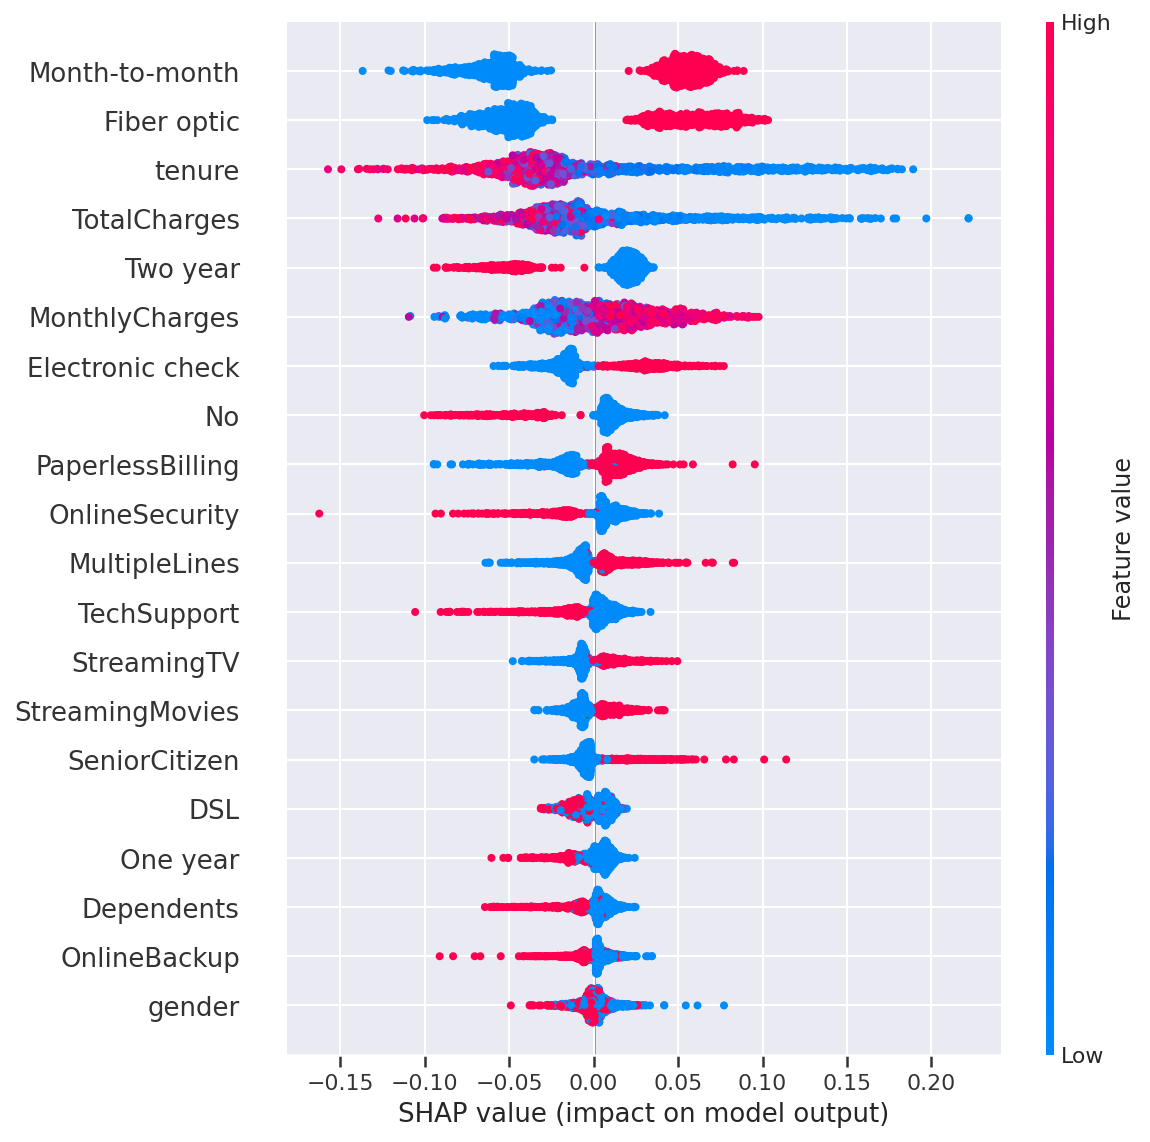

In [ ]:
shap.summary_plot(shap_values[1], X_test)

- shap summary plot을 사용하면 전체 특성이 모델에 어떤 영향을 주는지 한 눈에 확인할 수 있습니다.
- 빨간색은 특성의 값 자체가 큰것, 파란색은 특성의 값 자체가 작은 것을 의미합니다.
- tenure, totalcharges 같은 경우는 분산이 큰 것을 볼 수 있습니다. 
- 그래프 상에 점들은 아웃라이어를 의미합니다.

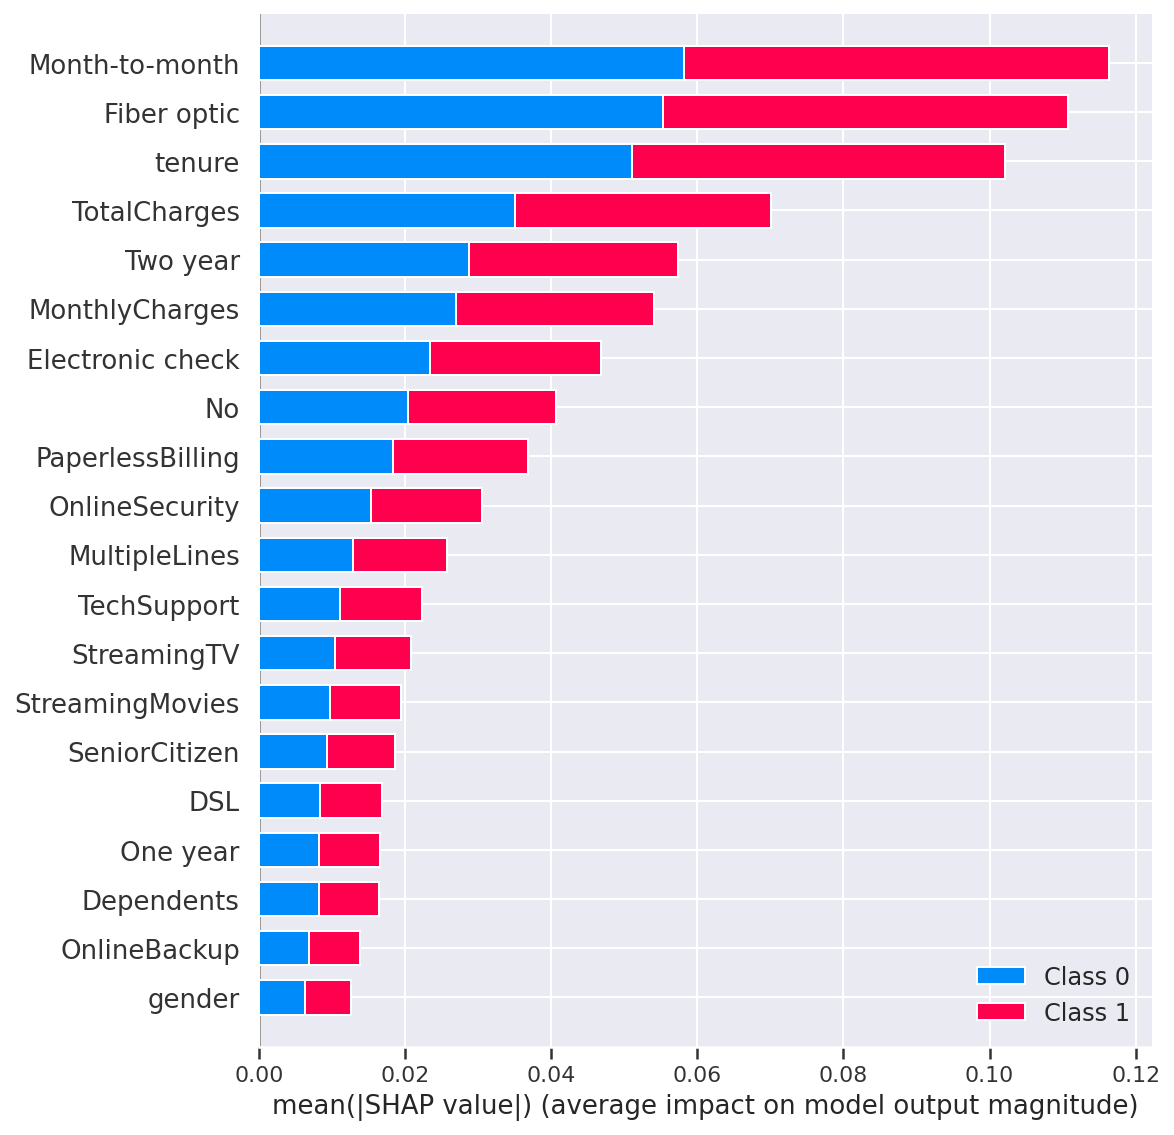

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type = 'bar')

- shap bar plot으로 특성들의 영향력을 전체적으로 평가하고 한 눈에 볼 수 있게 해줍니다.
- 보기엔 Feature importance와 비슷해보이지만 shap은 음수범위를 포함하고 있어 더 정확합니다.

# 6. 결론
### (1) 가설 검증 :
- 성별에 따라서 고객의 이탈하는 정도에 차이가 있을까?
###### => 성별에 따라서 고객의 이탈하는 정도에는 차이가 없었습니다.
- 사용기간에 따라서 고객이 이탈하는 정도에 차이가 있을까?
###### => 약 10개월 미만의 tenure를 갖는 고객들이 훨씬 더 많이 이탈합니다. tenure가 60개월 이상인 사람들은 더 많이 유지됩니다. 따라서 사용기간에 따라서 고객이 이탈하는 정도에 차이가 있습니다.
- TotalCharges'가 'tenure'과 'MonthlyCharges'와 관련이 있을까?
###### => TotalCharges 는 tenure, MonthlyCharges와 높은 상관관계를 보였습니다. 따라서 셋은 서로 관련이 있습니다.(상관관계 히트맵)

### (2) 문제 정의 : "통신회사에서 고객의 이탈을 어떻게 줄일 수 있을까?"

### (3) 해결책 :
1. 계약(Contract)을 Month-to-month로 한 고객들에 MonthlyCharges가 낮은 상품을 마케팅해서 이탈하지 않도록 합니다. Month-to-month 고객들이 이탈을 하는 빈도가 높으면서 동시에 이탈(churn)이라는 타겟에 유의미한 영향을 끼치는 중요한 고객입니다. 그들은 MonthlyCharges가 높으면 이탈하는 경향이 있기에 월별 요금이 적은 상품을 마케팅하면 장기고객으로 만들어낼 수 있습니다.
2. InternetService 중 하나인 Fiber optic 서비스를 점거할 필요가 있습니다. Fiber optic은 타겟에 큰 영향을 주는 특성 중 하나인데 countplot을 통해 대부분의 이탈고객들이 fiber optic을 사용하고 있었기때문입니다. 따라서 해당 서비스에 문제가 있어 고객에게 부정적인 경험을 제공한건 아닌지 설문조사를 해서 해당 부분을 고친다면 고객의 이탈을 막을 수 있습니다.

### (4) 데이터의 한계
- 데이터에는 시간이나 분기와 관련된 데이터가 전무하다. 따라서 그때 그때의 흐름과 트렌드를 읽어야하는 고객 이탈 이슈에서 이 데이터로는 완벽한 전략을 구사하는데 제한적이다. 
- 따라서 각 고객별로 분기나 시간 등 언제 어떤 기간에 churn을 했는지 알 수 있었다면 좀 더 정확하게 다음 분기 전략을 짤 수 있었을 것이다.

### (5) 프로젝트 질문
- 모델이 관측치를 예측하기 위해서 어떤 특성을 활용했나요?
###### 모델의 모든 특성의 성능을 보고자 모든 특성을 사용했습니다.
- 어떤 특성이 있다면 모델의 예측에 도움이 될까요? 해당 특성은 어떻게 구할 수 있을까요?
###### 위의 데이터 한계에서 언급했듯이 시간별, 분기별 고객의 이탈 자료가 있다면 다음 분기 고객 이탈여부를 예측할 때 큰 도움이 될 것입니다. 해당 특성은 각 기업별로 내부 자료에서 구할 수 있습니다.